In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive (4).zip to archive (4).zip


In [2]:
import zipfile
import os

with zipfile.ZipFile("archive (4).zip", 'r') as zip_ref:
    zip_ref.extractall("weather_data")

print("Extracted files:", os.listdir("weather_data"))


Extracted files: ['weatherHistory.csv']


In [4]:
import os
os.listdir("weather_data")


['weatherHistory.csv']

In [6]:
df = pd.read_csv("weather_data/weatherHistory.csv")


In [7]:
df.columns
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


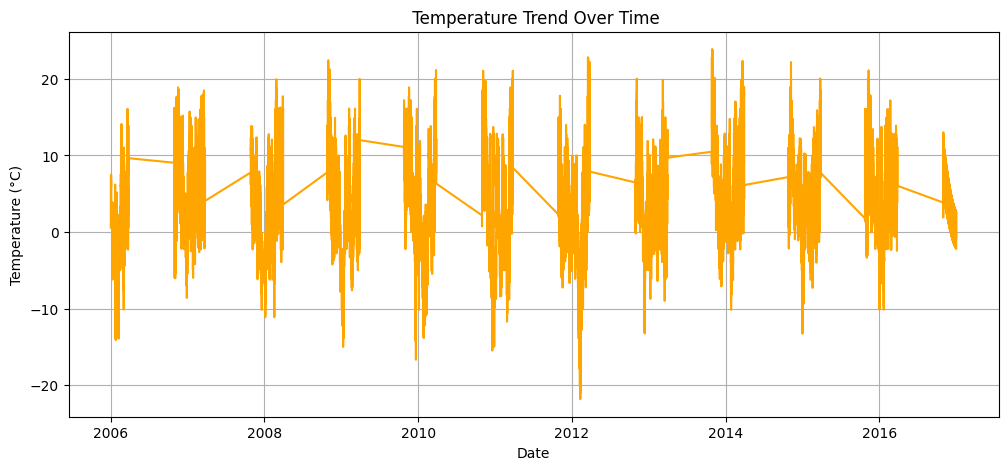

In [16]:

df.rename(columns={'Formatted Date': 'Date', 'Temperature (C)': 'Temperature'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Temperature'])

df = df.sort_values('Date')
df = df.reset_index(drop=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Temperature'], color='orange')
plt.title(" Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


In [10]:

df['Day'] = (df['Date'] - df['Date'].min()).dt.days

X = df[['Day']]
y = df['Temperature']


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("📉 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("📊 R2 Score:", r2_score(y_test, y_pred))


📉 RMSE: 5.643504249396429
📊 R2 Score: 0.006921893100203191


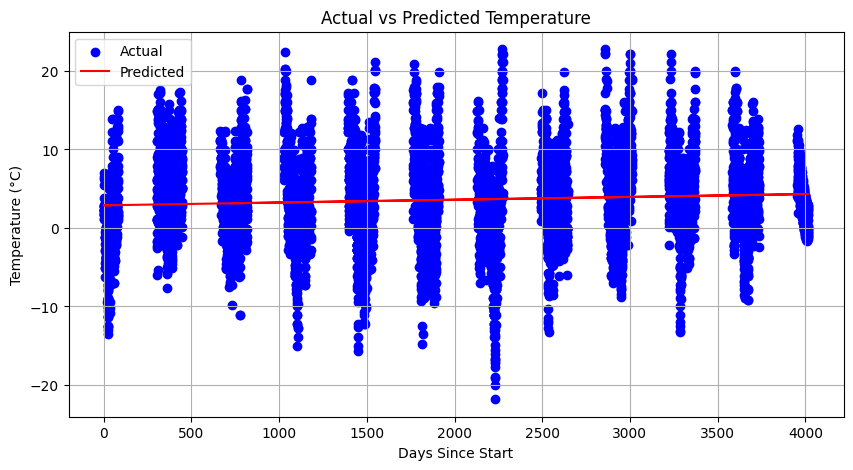

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Days Since Start")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()



In [14]:

future_day = df['Day'].max() + 30
import pandas as pd
future_temp = model.predict(pd.DataFrame({'Day': [future_day]}))


print(f"🌤️ Predicted Temperature after 30 days: {future_temp[0]:.2f} °C")


🌤️ Predicted Temperature after 30 days: 4.33 °C
